# Introdução ao aprendizado de máquina utilizando Python

#### Professor: Luiz Antonio de Sousa Ferreira

#### Contato: luiz.ferreira@outlook.com | [@luizsferreira](http://instagram.com/luizsferreira) (IG)

Acesso: [bit.ly/pucpcaldas](http://bit.ly/pucpcaldas)

__________

## Trabalhando com dados da Web

### Você conhece o Twitter?

Twitter é uma rede social e um servidor para microblogging, que permite aos usuários enviar e receber atualizações pessoais de outros contatos (em textos de até 280 caracteres, conhecidos como "tweets"), por meio do website do serviço, por SMS e por softwares específicos de gerenciamento.

O twitter foi criado em Março de 2006 por Jack Dorsey, Evan Williams, Biz Stone e Noah Glass e foi lançado em Julho de 2006 nos EUA. A ideia inicial dos fundadores era que o Twitter fosse uma espécie de "SMS da internet" com a limitação de caracteres de uma mensagem de celular. Inicialmente chamada Twttr (sem vogais), o nome da rede social, em inglês, significa gorjear. A ideia é que o usuário da rede social está "piando" pela internet. Desde sua criação, o Twitter ganhou extensa notabilidade e popularidade por todo mundo. Jack Dorsey é o atual CEO da empresa.

![](https://camo.githubusercontent.com/e1a4dbb988314096536245304f5bdc4bce5fac87/68747470733a2f2f696d616765732d6e612e73736c2d696d616765732d616d617a6f6e2e636f6d2f696d616765732f492f33314b6c7554356e426b4c2e706e67)

### Twitter e o Bootstrap

Bootstrap é um projeto de código aberto originalmente desenvolvido para o site Twitter, chamado de Twitter Blueprint, desenvolvido por Mark Otto e Jacó Thornton como um instrumento para incentivar a consistência através de ferramentas internas.

Antes de Bootstrap, várias bibliotecas foram utilizados para o desenvolvimento de interfaces, gerando inconsistências e um elevado peso de manutenção. De acordo com o desenvolvedor Mark Otto:

"Um grupo super pequeno de desenvolvedores e eu nos reunimos para projetar e construir uma nova ferramenta interna e vi uma oportunidade de fazer algo mais. Através desse processo, nós nos vimos construindo algo muito mais substancial do que outra ferramenta interna. Meses depois, terminamos com uma versão inicial do Bootstrap como forma de documentar e compartilhar padrões comuns de design e ativos dentro da empresa "

Depois de alguns meses de desenvolvimento por um pequeno grupo, muitos desenvolvedores no Twitter começaram a contribuir com o projeto, como parte da Hack Week. Ele foi renomeado como Twitter Blueprint to Bootstrap, e lançado como um projeto de código aberto em 19 de agosto de 2011. Ele continuou a ser mantida por Mark Otto, Jacob Thornton, e um pequeno grupo de desenvolvedores, bem como uma grande comunidade de colaboradores.

### Nesta aula iremos:

- Extrair os dados do Twitter usando tweepy e aprender como lidar com isso usando pandas.
- Traçar algumas estatísticas básicas e visualizações com numpy, matplotlib e seaborn.
- Fazer uma análise de sentimentos de tweets extraídos (Trump) usando textblob.

#### Para executar o processo em casa, precisaremos de:

- Python 2.7 ou 3.6
- Numpy: Este é o pacote fundamental para computação científica com Python. Além de seus usos científicos óbvios, o NumPy também pode ser usado como um contêiner multidimensional eficiente de dados genéricos.
- Pandas: Esta é uma biblioteca de código aberto que fornece estruturas de dados de alto desempenho e fáceis de usar, além de ferramentas de análise de dados.
- Tweepy: Esta é uma biblioteca Python fácil de usar para acessar a API do Twitter.
- Matplotlib: Esta é uma biblioteca de plotagem 2D em Python que produz números de qualidade de publicação em uma variedade de formatos impressos e ambientes interativos entre plataformas.
- Seaborn : Esta é uma biblioteca de visualização Python baseada no matplotlib. Ele fornece uma interface de alto nível para desenhar gráficos estatísticos atraentes.
- Textblob : Esta é uma biblioteca Python para processamento de dados textuais. Ele fornece uma API simples para mergulhar em tarefas comuns de processamento de linguagem natural (NLP).

Todos os pacotes podem ser instalados através do comando "pip".

## Extraindo informações do Twitter (tweepy + pandas)

### Importação de bibliotecas

Essa parte é simples, devemos importar as bilbiotecas que iremos utilizar, podemos dividir essas importações em duas partes: as que comandam o processamento dos dados e outra para trabalhar a visualização dos mesmos.

In [1]:
# Importação Geral:
import tweepy           # Para consumir a API do Twitter
import pandas as pd     # Para manipular dados
import numpy as np      # Para computação de números

# Para plotagem e visualização:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

### Criando um aplicativo do Twitter

O Twitter exige um cadastro com especificações do uso de sua API, para uma futura análise e proteção de seus dados, por isso, antes de iniciar a aplicação, deve-se solicitar uma acesso de desenvolvedor ao Twitter para poder realizar a criação de um novo aplicativo.

Para isso devemos acessar https://apps.twitter.com. Caso necessite de uma ajuda para a criação dessa conta, recomenda-se seguir o tutorial oficial, disponível [nesse link](https://developer.twitter.com/en/docs/ads/general/guides/getting-started.html).

A partir desse aplicativo, o Twitter lhe fornnecerá informações para acessar os seus dados, são elas:

- Chave do Consumidor (Chave da API)
- Segredo do Consumidor (Segredo da API)
- Token de Acesso
- Segredo do Token de Acesso

Vamos importar um arquivo apenas com as chaves, ele deverá se chamar de credentials:

In [ ]:
# Chaves de acesso à API do Twitter para @user

# Consumir:
CONSUMER_KEY    = ''
CONSUMER_SECRET = ''

# Acesso:
ACCESS_TOKEN  = ''
ACCESS_SECRET = ''

Com essas informações podemos consumir a API do Twitter, para isso, criaremos uma função para permitira a autenticação das chaves, vamos adicionar o código abaixo em outra célula de código e executá-la.

### Célula de código

Essa característica permite que executemos trechos específicos de um script conforme nossa necessidade, evitando acesso desnecessário a bancos de dados e arquivos, diminuindo o custo computacional da tarefa. No Pycharm devemos instalar um plugin chamado PyCharm cell mode, que permitirá executar trechos de códigos que estiverem entre duplas de #, como, por exemplo:

#

...

#

In [2]:
# Vamos importar nossas chaves:
from credentials import *    # Isso irá permitir o uso das chaves

# API's setup:
def twitter_setup():
    """
    Função necessároa para configurar a API do Twitter para o acesso através de nossas chaves de segurança.
    """
    # Autenticação e acesso utilizando chaves:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Retorna a API com os dados:
    api = tweepy.API(auth)
    return api

### Extração de tweets

Agora que criamos a função para configurar a API do Twitter, podemos usar essa função para criar um objeto "extractor". Para isso, vamos usar a função do Tweepy extractor.user_timeline(screen_name, count) para extrair do usuário (screen_name) a quantidade de (count) tweets.

Podemos trabalhar com qualquer perfil, mas, por curiosidade, vamos escolher o perfil do @DonaldTrump como o usuário para extração de dados para análise.

Portanto, para extrairmos os dados vamos utilizar:

In [89]:
# Vamos criar um objeto extractor
extractor = twitter_setup()

# Vamos criar uma lista de tweets:
tweets = extractor.user_timeline(screen_name="JairBolsonaro", count=200)
print("Número de tweets extraídos: {}.\n".format(len(tweets)))

# Vamos imprimir os últimos 5 tweets:
print("Últimos 5 tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Número de tweets extraídos: 200.

Últimos 5 tweets:

Obrigado sempre pela consideração @OdeCarvalho . Você faz parte desta mudança. https://t.co/Pvse6SkHHc

Link no youtube da live feita no facebook: Novas informações e mentiras que estão sendo difundidas a meu respeito. https://t.co/KHVgWnfrGc

Logo mais, às 20:00, quarta-feira,(24/10/2018), faremos nova live no facebook com novas informações e mentiras que… https://t.co/hnoVDgSEYA

A melhor forma de mostrar respeito às pessoas é tratando-as de igual pra igual, valorizando-as por seu caráter e co… https://t.co/WMnsWDMmaW

Há um complô espalhando fakenews descaradas e descontextualizadas contra mim oriundas de parlamentares e partidos d… https://t.co/1Vfcz3yh5Y



Com isso teremos uma saída que contem o número de tweets extraídos e uma lista com os últimos 5 tweets para confirmação das informações extraídas. Temos então um extrator e uma lista chamada tweets com todos os dados para nossa análise.

### Criando um DataFrame

Para manipularmos os dados dentro de tweets devemos construir um DataFrame pandas, esse DataFrame será responsável por deixar nossas atividades muito mais simples.

A função display do IPython plota uma saída de maneira amigável e o método head de um dataframe nos permite recuperar os primeiros elementos.

Então, usando a compeensão da lista do Python:

In [93]:
# Criando o DataFrame:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# Exibindo os 10 primeiros elementos do DataFrame
display(data.head(10))

,Tweets
0,Obrigado sempre pela consideração @OdeCarvalho...
1,Link no youtube da live feita no facebook: Nov...
2,"Logo mais, às 20:00, quarta-feira,(24/10/2018)..."
3,A melhor forma de mostrar respeito às pessoas ...
4,Há um complô espalhando fakenews descaradas e ...
5,Mais uma mentira descarada do fantoche de corr...
6,RT @cor0te: As definições de ameaça à democrac...
7,"Esperamos uma retratação de todos os que, mesm..."
8,Concordo com o Mano Brown! 👍🏻 https://t.co/crI...
9,Segue a fonte: https://t.co/wNF6hCAvCq


Podemos ver os métodos disponibilizados para cada tweet através do Tweepy:

In [94]:
# Métodos internos de um único objeto tweet:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'extended_entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


A parte mais interessante é a quantidade de metadados contidos em um único tweet. Se quisermos obter dados como a data de criação ou a origem da criação, podemos acessar as informações através desses atributos.

In [95]:
# Imprimindo informações do primeiro tweet coletado:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

1055255347357720576
2018-10-25 00:30:55
Twitter for iPhone
7051
1690
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'OdeCarvalho', 'name': 'Olavo de Carvalho', 'id': 46822091, 'id_str': '46822091', 'indices': [34, 46]}], 'urls': [], 'media': [{'id': 1055255271956758529, 'id_str': '1055255271956758529', 'indices': [79, 102], 'media_url': 'http://pbs.twimg.com/ext_tw_video_thumb/1055255271956758529/pu/img/KzNp5XFEm-s5BT0R.jpg', 'media_url_https': 'https://pbs.twimg.com/ext_tw_video_thumb/1055255271956758529/pu/img/KzNp5XFEm-s5BT0R.jpg', 'url': 'https://t.co/Pvse6SkHHc', 'display_url': 'pic.twitter.com/Pvse6SkHHc', 'expanded_url': 'https://twitter.com/jairbolsonaro/status/1055255347357720576/video/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 636, 'h': 360, 'resize': 'fit'}, 'large': {'w': 636, 'h': 360, 'resize': 'fit'}, 'small': {'w': 636, 'h': 360, 'resize': 'fit'}}}]}


Agora podemos solicitar os dados relevantes e adicioná-los ao nosso dataframe.

### Adicionando informações relevantes ao nosso DataFrame

Como vimos, podemos obter muitos dados de um único tweet. Mas nem todos esses dados são úteis para todas as situações. No nosso caso, vamos adicionar alguns dados ao nosso dataframe, para isso, usaremos a compreensão da lista Pythons e uma nova coluna será adicionada ao dataframe simplesmente adicionando o nome do conteúdo entre colchetes e atribuindo o conteúdo. O código vai se parecer com:

In [96]:
# Adicionando dados relevantes ao DataFrame
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

E para exibir novamente as informações coletadas basta invocar a função display:

In [97]:
# Exibindo os 10 primeiros elementos do DataFrame:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,Obrigado sempre pela consideração @OdeCarvalho...,102,1055255347357720576,2018-10-25 00:30:55,Twitter for iPhone,7051,1690
1,Link no youtube da live feita no facebook: Nov...,138,1055247760092553221,2018-10-25 00:00:46,Twitter for iPhone,6186,1853
2,"Logo mais, às 20:00, quarta-feira,(24/10/2018)...",139,1055215019133202432,2018-10-24 21:50:40,Twitter for iPhone,16661,4231
3,A melhor forma de mostrar respeito às pessoas ...,140,1055210728653766656,2018-10-24 21:33:37,Twitter for iPhone,32164,8960
4,Há um complô espalhando fakenews descaradas e ...,140,1055192032032026627,2018-10-24 20:19:19,Twitter for iPhone,20804,6173
5,Mais uma mentira descarada do fantoche de corr...,81,1055166110428024832,2018-10-24 18:36:19,Twitter for iPhone,20228,6296
6,RT @cor0te: As definições de ameaça à democrac...,91,1055163290349981696,2018-10-24 18:25:07,Twitter for iPhone,0,4389
7,"Esperamos uma retratação de todos os que, mesm...",140,1055154125128826881,2018-10-24 17:48:41,Twitter for iPhone,43836,12233
8,Concordo com o Mano Brown! 👍🏻 https://t.co/crI...,53,1055131515674337280,2018-10-24 16:18:51,Twitter for iPhone,48223,10967
9,Segue a fonte: https://t.co/wNF6hCAvCq,38,1055109376304922625,2018-10-24 14:50:52,Twitter for iPhone,11598,2873


Agora que extraímos e temos os dados de uma maneira ordenada e fácil de manusear, estamos prontos para fazer um pouco mais de manipulação para visualizar alguns gráficos e coletar alguns dados estatísticos. A primeira parte está concluída.

### Visualização e estatísticas básicas
#### Médias e popularidade

Primeiro queremos calcular alguns dados estatísticos básicos, como a média do comprimento dos caracteres de todos os tweets, o tweet com mais likes e retweets, etc.

Para obter a média, usando NumPy:

In [98]:
# Extraindo a média dos tamanhos:
mean = np.mean(data['len'])

print("Tamanho médio dos tweets: {}".format(mean))

Tamanho médio dos tweets: 108.505


Para extrair mais dados, usaremos algumas funcionalidade do pandas:

In [99]:
# Extraindo o tweet com mais Likes e Retweets:

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("O tweet com mais likes é: \n{}".format(data['Tweets'][fav]))
print("Número de likes: {}".format(fav_max))
print("{} caracteres.\n".format(data['len'][fav]))

# Max RTs:
print("O tweet com mais retweets é: \n{}".format(data['Tweets'][rt]))
print("Número de retweets: {}".format(rt_max))
print("{} caracteres.\n".format(data['len'][rt]))

O tweet com mais likes é: 
Mudou as cores do partido, escondeu o chefe presidiário, escondeu o apoio à ditadura venezuelana, tentou abortar o… https://t.co/VpvXEi0AEJ
Número de likes: 82221
139 caracteres.

O tweet com mais retweets é: 
Mudou as cores do partido, escondeu o chefe presidiário, escondeu o apoio à ditadura venezuelana, tentou abortar o… https://t.co/VpvXEi0AEJ
Número de retweets: 20904
139 caracteres.



Isso é comum, mas não necessariamente acontecerá: o tweet com mais curtidas é o tweet com mais retweets. O que fizemos foi encontrar o número máximo de curtidas da coluna 'Likes' e o número máximo de retweets dos 'RTs' usando a maxfunção de numpy . Com isso, apenas procuramos o índice em cada uma das duas colunas que satisfazem o máximo. Como mais de um pode ter o mesmo número de likes / retweets (o máximo), precisamos apenas pegar o primeiro encontrado, e é por isso que usamos .index[0] para atribuir o índice às variáveis fave rt. Para imprimir o tweet que satisfaz, acessamos os dados da mesma forma que acessamos uma matriz ou qualquer objeto indexado.

### Séries temporais

Pandas tem seu próprio objeto para séries temporais. Como temos um vetor inteiro com datas de criação, podemos construir séries temporais que respeitam comprimentos de tweets, curtidas e retweets.

In [100]:
# Criação de séries temporais:

tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

E se quisermos plotar a série temporal, os pandas já tem seu próprio método no objeto. Podemos traçar uma série temporal da seguinte forma:

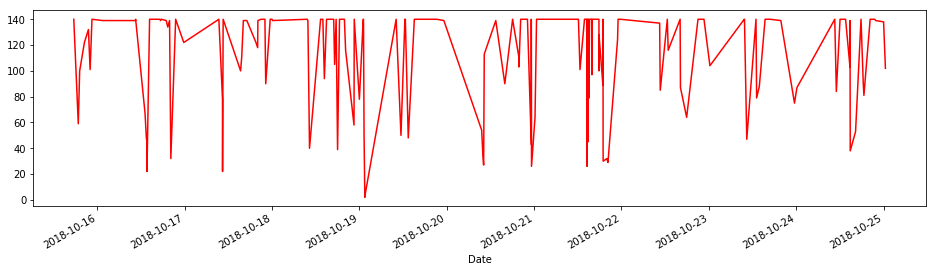

In [101]:
# Tamanho conforme o tempo:
tlen.plot(figsize=(16,4), color='r');

E para traçar os likes versus os retweets no mesmo gráfico:



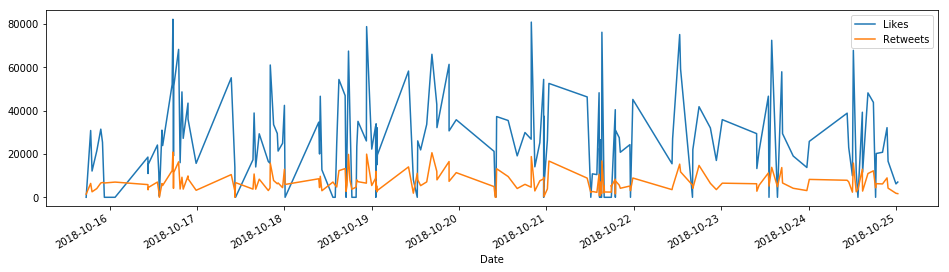

In [102]:
# Likes vs RT:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

### Gráficos de pizza de fontes

Agora vamos plotar as fontes em um gráfico de pizza, já que percebemos que nem todo tweet é tweetado da mesma fonte (😱🤔). Primeiro limpamos todas as fontes:

In [104]:
# Obtenção de todas as possível fontes de tweets:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# Imprimindo a lista de fontes de tweets:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter for iPhone


Com isso obteremos todas as fontes de tweets utilizadas pelo usuário e, depois disso, vamos criar um gráfico de pizza para analisarmos as fontes de origem dos tweets.



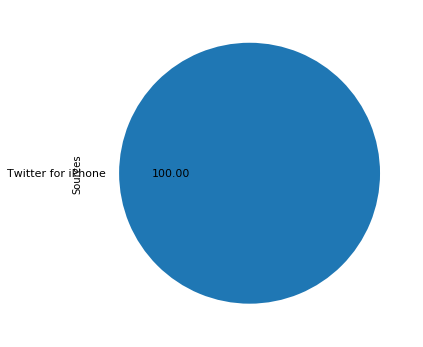

In [105]:
# Criação de um vetor numpy mapeado pelos labels:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Gráfico de pizza:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

## Análise de sentimentos

### Importando textblob

Como mencionamos no início deste post, textblob nos permitirá fazer análises de sentimentos de uma maneira muito simples. Também usaremos a rebiblioteca do Python, que é usada para trabalhar com expressões regulares . Para isso, fornecerei duas funções de utilitário para:

a) limpar o texto (o que significa que qualquer símbolo distinto de um valor alfanumérico será remapeado em um novo que satisfaça essa condição)

b) criar um classificador para analisar o polaridade de cada tweet após a limpeza do texto. Não vou explicar a maneira específica pela qual a função que limpa funciona, pois seria estendida e poderia ser melhor entendida na documentação oficial de re.

In [106]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Função utilizada para limpar o texto em um tweet removendo links e caracteres especiais utilizando regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Função utilizada para classificar a polaridade de um tweet usando textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

A maneira como funciona o textblob é já fornecer um analisador treinado (legal, certo?). O Textblob pode trabalhar com diferentes modelos de aprendizado de máquina usados no processamento de linguagem natural . Se você quiser treinar seu próprio classificador (ou pelo menos verificar como ele funciona), fique à vontade para verificar o seguinte [link](https://textblob.readthedocs.io/en/dev/classifiers.html). Esse classificador poderá retornar conteúdo não muito relevante, já que estamos trabalhando com um modelo pré-treinado (para o qual não usamos os dados que foram usados no treinamento).

De qualquer forma, voltando ao código, vamos apenas adicionar uma coluna extra aos nossos dados. Esta coluna irá conter a análise de sentimento e podemos traçar o dataframe para ver a atualização:

In [107]:
# Cria a coluna com o resultado da análise:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# Exibe o dataframe atualizado com uma nova coluna
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,Obrigado sempre pela consideração @OdeCarvalho...,102,1055255347357720576,2018-10-25 00:30:55,Twitter for iPhone,7051,1690,0
1,Link no youtube da live feita no facebook: Nov...,138,1055247760092553221,2018-10-25 00:00:46,Twitter for iPhone,6186,1853,1
2,"Logo mais, às 20:00, quarta-feira,(24/10/2018)...",139,1055215019133202432,2018-10-24 21:50:40,Twitter for iPhone,16661,4231,1
3,A melhor forma de mostrar respeito às pessoas ...,140,1055210728653766656,2018-10-24 21:33:37,Twitter for iPhone,32164,8960,0
4,Há um complô espalhando fakenews descaradas e ...,140,1055192032032026627,2018-10-24 20:19:19,Twitter for iPhone,20804,6173,0
5,Mais uma mentira descarada do fantoche de corr...,81,1055166110428024832,2018-10-24 18:36:19,Twitter for iPhone,20228,6296,0
6,RT @cor0te: As definições de ameaça à democrac...,91,1055163290349981696,2018-10-24 18:25:07,Twitter for iPhone,0,4389,0
7,"Esperamos uma retratação de todos os que, mesm...",140,1055154125128826881,2018-10-24 17:48:41,Twitter for iPhone,43836,12233,0
8,Concordo com o Mano Brown! 👍🏻 https://t.co/crI...,53,1055131515674337280,2018-10-24 16:18:51,Twitter for iPhone,48223,10967,0
9,Segue a fonte: https://t.co/wNF6hCAvCq,38,1055109376304922625,2018-10-24 14:50:52,Twitter for iPhone,11598,2873,0


Como podemos ver, a última coluna contém a análise de sentimento (SA). Agora só precisamos verificar os resultados.

## Analisando os resultados

Para ter uma maneira simples de verificar os resultados, vamos contar o número de tweets neutros, positivos e negativos e extrair as porcentagens.

In [108]:

# Construindo listas com tweets classificados:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

Agora que temos as listas, apenas imprimimos as porcentagens:

In [109]:
# Imprimindo porcentagens:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 4.5%
Percentage of neutral tweets: 93.0%
Percentage de negative tweets: 2.5%


Temos que considerar que estamos trabalhando apenas com os 200 tweets mais recentes de D. Trump. Para resultados mais precisos, podemos considerar mais tweets. Uma coisa interessante (um convite para os leitores) é analisar a polaridade dos tweets de diferentes fontes, pode ser determinístico que, considerando apenas os tweets de uma fonte, a polaridade resultaria mais positiva / negativa. De qualquer forma, espero que isso tenha resultado interessante.

Como vimos, podemos extrair, manipular, visualizar e analisar dados de maneira muito simples com o Python. Espero que isso deixe alguma incerteza, para incentivar uma maior exploração usando essas ferramentas.